In [70]:
from src.utils.results_utils import *

from src.utils.data_utils import str_dict_to_values

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import stats

In [71]:
df_ethnicity = pd.read_csv('data/name_ethnicity.csv')

In [72]:
total_count = len(df_ethnicity['Name'])
name_count = df_ethnicity['Name'].nunique()
country_count = df_ethnicity['Country'].nunique()

summary_df = pd.DataFrame({
    'Category': ['Total Names','Unique Names', 'Unique Countries'],
    'Count': [total_count, name_count, country_count]
})

summary_df.head()

,Category,Count
0,Total Names,13613
1,Unique Names,4503
2,Unique Countries,108


In [80]:
df_ethnicity['Country'].value_counts().head(20)


Country
British           2791
ex-USSR           1553
Germany           1359
France/Belgium    1054
Italy              786
Japan              474
Sweden             441
Netherlands        403
Switzerland        357
Poland             326
Denmark            309
Hungary            306
Czechoslovakia     296
Yugoslavia         283
Hispanic           249
Brazil             248
Cuba               234
Bulgaria           217
Austria            216
Korea              176
Name: count, dtype: int64

In [74]:
country_count = df_ethnicity['Country'].value_counts()
country_to_keep = country_count[country_count>1500].index

df_ethnicity_f = df_ethnicity[df_ethnicity['Country'].isin(country_to_keep)] # only keep countries that appear more than 750 times

In [75]:
def get_vowel_stats(df:pd.DataFrame):
    vowels = set('aeiouy')

    def count_vowels(name):
        return sum(1 for char in name.lower() if char in vowels)

    def count_consonants(name):
        return sum(1 for char in name.lower() if char not in vowels)

    df['vowel_count'] = df['Name'].apply(count_vowels)
    df['consonant_count'] = df['Name'].apply(count_consonants)

    stats_gender_vowels = df.groupby('Country')['vowel_count'].agg(['mean', 'std'])
    stats_gender_consonants = df.groupby('Country')['consonant_count'].agg(['mean', 'std'])
    return stats_gender_vowels, stats_gender_consonants

df_vowels, df_consonants = get_vowel_stats(df_ethnicity_f)

C:\Users\amaur\AppData\Local\Temp\ipykernel_23440\719508959.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amaur\AppData\Local\Temp\ipykernel_23440\719508959.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



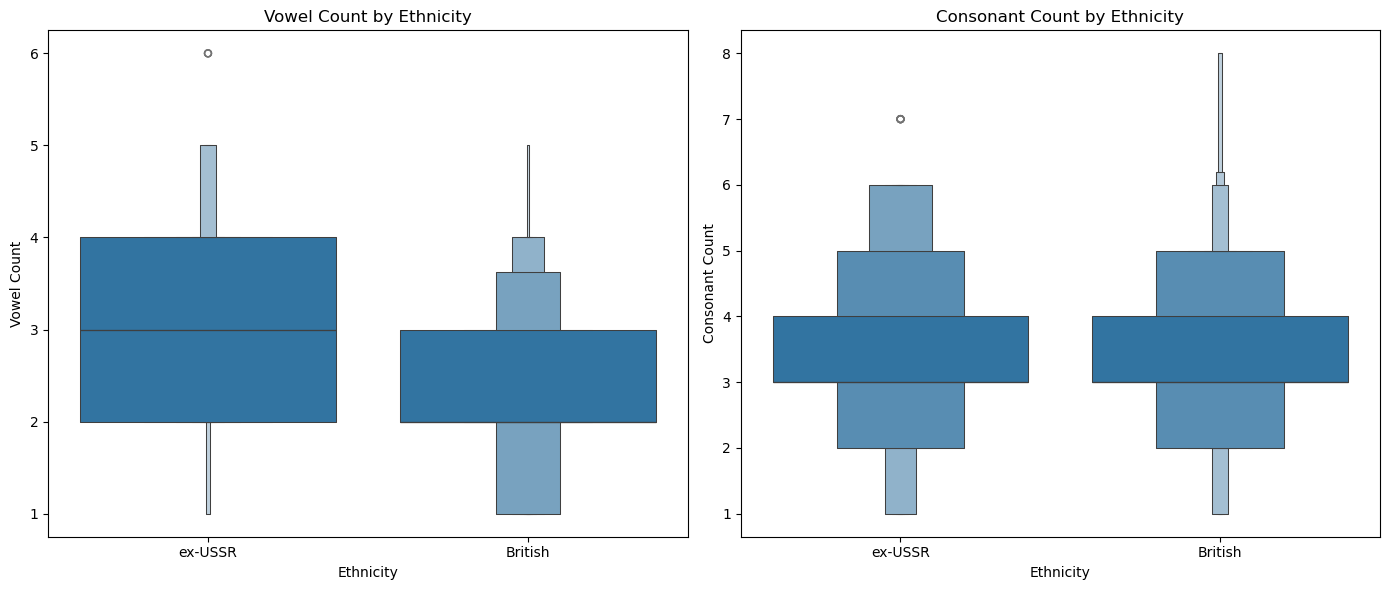

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for vowel count by sex
sns.boxenplot(data=df_ethnicity_f, x='Country', y='vowel_count', ax=axes[0])
axes[0].set_title('Vowel Count by Ethnicity')
axes[0].set_xlabel('Ethnicity')
axes[0].set_ylabel('Vowel Count')

# Boxplot for consonant count by Country
sns.boxenplot(data=df_ethnicity_f, x='Country', y='consonant_count', ax=axes[1])
axes[1].set_title('Consonant Count by Ethnicity')
axes[1].set_xlabel('Ethnicity')
axes[1].set_ylabel('Consonant Count')

plt.tight_layout()

In [77]:
def get_length_stats(df:pd.DataFrame, column_name, column_groupby):
    df['name_length'] = df[column_name].apply(lambda name: len(name))
    stats_length = df.groupby(column_groupby)['name_length'].agg(['mean', 'std'])
    return stats_length

df_length = get_length_stats(df_ethnicity_f, column_name='Name', column_groupby='Country')

print('Length stats for names by ethnicity:')
df_length.head()

Length stats for names by ethnicity:


C:\Users\amaur\AppData\Local\Temp\ipykernel_23440\1570249696.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,mean,std
Country,,
British,5.769975,1.457194
ex-USSR,6.402447,1.572859


C:\Users\amaur\AppData\Local\Temp\ipykernel_23440\1660653710.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



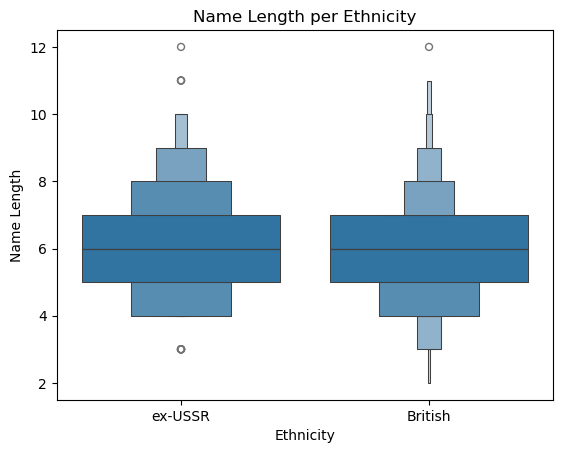

In [78]:
def create_boxenplot_by_Country(data: pd.DataFrame, column_name, abcisse):
    data['name_length'] = data[column_name].apply(lambda name: len(name))

    fig = sns.boxenplot(data, x=abcisse, y='name_length')
    fig.set_xlabel('Ethnicity')
    fig.set_ylabel('Name Length')
    fig.set_title('Name Length per Ethnicity')

create_boxenplot_by_Country(df_ethnicity_f, column_name='Name', abcisse='Country')

In [79]:
def create_letter_count_df(df, letter_position):

    df_letter = df.copy()
    df_letter['letter'] = df_letter['Name'].apply(lambda name: name[letter_position].lower())
    
    letter_counts_H = df_letter[df_letter['Country'] == 'ex-USSR']['letter'].value_counts()
    letter_counts_F = df_letter[df_letter['Country'] == 'British']['letter'].value_counts()

    male_count = df_letter[df_letter['Country'] == 'ex-USSR'].shape[0]
    female_count = df_letter[df_letter['Country'] == 'British'].shape[0]
    letter_counts_H_percentage = letter_counts_H / male_count*100
    letter_counts_F_percentage = letter_counts_F / female_count*100
    letter_counts = pd.concat([letter_counts_H_percentage, letter_counts_F_percentage], axis=1)
    letter_counts.columns = ['letter_men', 'letter_women']
    letter_counts = letter_counts.head(26)  # Limit to top 26 letters

    top_letter_names = (
        df_letter.groupby(['letter', 'Country'])['Name']
        .apply(lambda x: x.value_counts().head(3).index.tolist())
        .unstack(fill_value=[])
    )

    return letter_counts, top_letter_names

def plot_letter_name_percentage(df, letter_position, comparison):

    letter_counts, top_letter_names = create_letter_count_df(df, letter_position)

    if letter_position == 0:
        title = f'Percentage of Names Starting by Each Letter by {comparison}'
    else:
        title = f'Percentage of Names Ending by Each Letter by {comparison}'

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=letter_counts.index,
        y=letter_counts['letter_men'],
        name='ex-USSR',
        marker_color='salmon',
        hovertext=[f"Top names: {', '.join(top_letter_names.loc[letter, 'ex-USSR'])}" if 'ex-USSR' in top_letter_names.columns else "" for letter in letter_counts.index],
        hoverinfo="text"
    ))

    fig.add_trace(go.Bar(
        x=letter_counts.index,
        y=letter_counts['letter_women'],
        name='Brittish',
        marker_color='skyblue',
        hovertext=[f"Top names: {', '.join(top_letter_names.loc[letter, 'British'])}" if 'British' in top_letter_names.columns else "" for letter in letter_counts.index],
        hoverinfo="text"
    ))

    fig.update_layout(
        title=title,
        xaxis_title='Letter of the Name',
        yaxis_title='% of Total Names by Ethnicity',
        barmode='group',
        yaxis=dict(ticksuffix='%'),
        legend_title="Ethnicity"
    )

    fig.show()

plot_letter_name_percentage(df_ethnicity_f, 0, comparison='Country')
plot_letter_name_percentage(df_ethnicity_f, -1, comparison='Country')
